In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Importing python libraries we may need

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload datasets

In [2]:
from google.colab import files
uploaded = files.upload()

Saving auditors.csv to auditors.csv
Saving prices.csv to prices.csv
Saving stores.json to stores.json


Read stores json file

In [0]:
stores = pd.read_json('stores.json')

In [98]:
stores.head(100)

,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York
5,9487,Trader Joes,New York
6,2938,Wegmans,New York
7,50948,Whole Foods,New York
8,40593,Walmart,Kansas
9,29384,Trader Joes,Kansas


Count plot for Store ID, Banner, Region

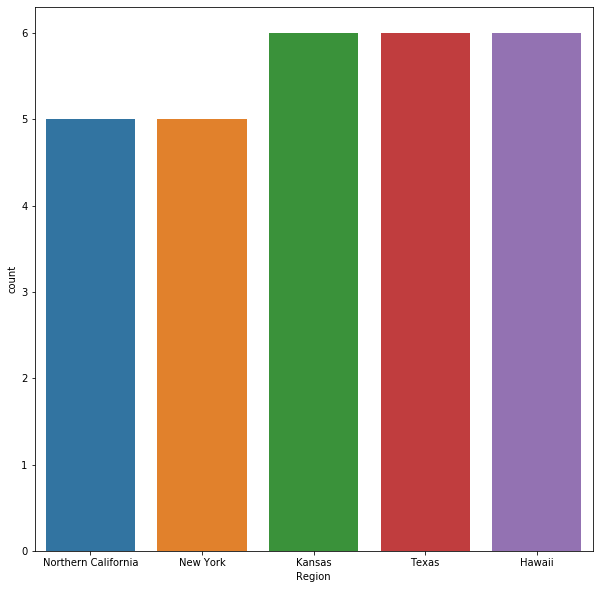

In [5]:
plt.figure(figsize=[10,10])
cplt_r = sns.countplot(x='Region', data= stores)

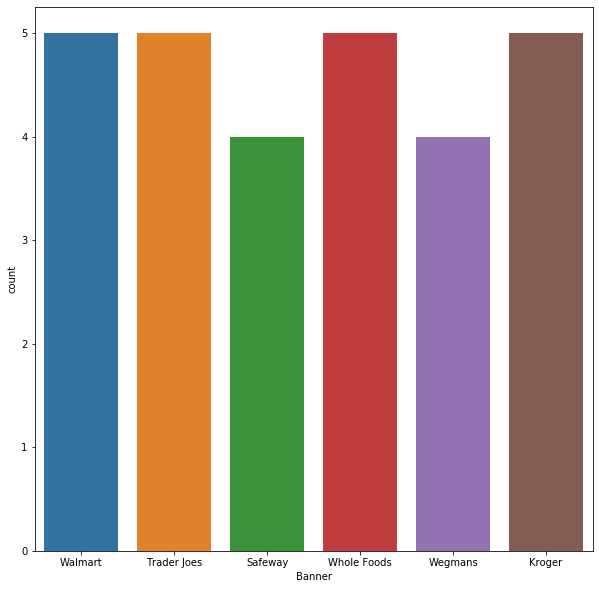

In [6]:
plt.figure(figsize=[10,10])
cplt_b = sns.countplot(x='Banner', data= stores)

Read auditors csv file

In [0]:
auditors = pd.read_csv('auditors.csv')

In [102]:
auditors.head(10)

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas
5,63,Randy,Johnson,Texas
6,1326,Mike,Johnson,Kansas
7,713,Dave,Johnson,Kansas


Auditors were sent only to four regions: Northern California, New York, Texas, and Kansas as shown in the above data table. No auditor was sent to Hawaii.

Eight auditors participated in the recording price and assortment information in four regions except Hawaii. 

In [106]:
auditors

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas
5,63,Randy,Johnson,Texas
6,1326,Mike,Johnson,Kansas
7,713,Dave,Johnson,Kansas


Read prices csv file

In [0]:
prices = pd.read_csv('prices.csv')

In [108]:
prices.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/17,24.95,66999,268588472
1,234,10/27/17,49.71,66999,475245085
2,234,10/20/17,25.75,66999,126967843
3,234,10/23/17,18.81,66999,708930835
4,234,10/23/17,33.32,66999,325885139


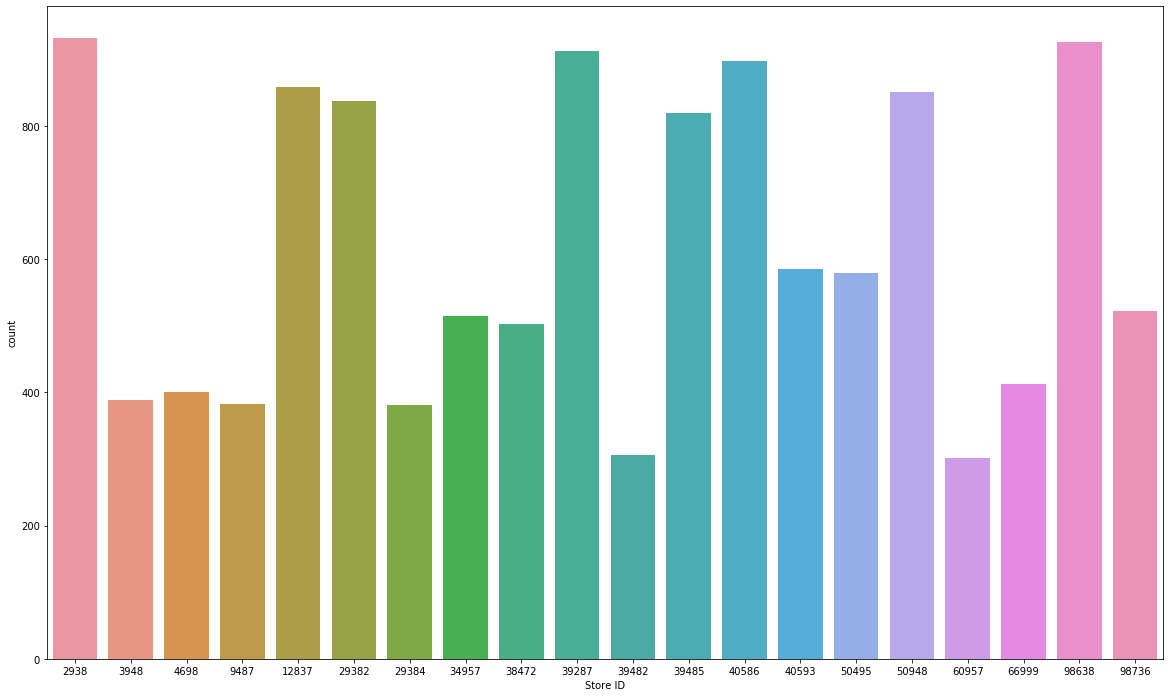

In [109]:
plt.figure(figsize=[20,12])
cplt_ss = sns.countplot(x= 'Store ID', data= prices)

# The graph shown above shows the complete price information was collected from twenty different stores.

# Now let us merge prices and stores data 

In [0]:
merged = pd.merge( prices,stores, on = 'Store ID', how = 'outer')

In [114]:
merged.groupby('Store ID').count() 

,Auditor ID,Date,Price,UPC,Banner,Region
Store ID,,,,,,
2938,933,933,933,933,933,933
3948,389,389,389,389,389,389
4698,401,401,401,401,401,401
6746,0,0,0,0,1,1
9487,382,382,382,382,382,382
11123,0,0,0,0,1,1
12837,859,859,859,859,859,859
29342,0,0,0,0,1,1
29382,838,838,838,838,838,838


In [117]:
merged.groupby('Region').count()

,Auditor ID,Date,Price,Store ID,UPC,Banner
Region,,,,,,
Hawaii,0,0,0,6,0,6
Kansas,3087,3087,3087,3088,3087,3088
New York,3025,3025,3025,3026,3025,3026
Northern California,1634,1634,1634,1635,1634,1635
Texas,3765,3765,3765,3766,3765,3766


# The table above shows no price and assortment information was collected for stores in Hawaii.

In [119]:
merged.groupby('Banner').count()

,Auditor ID,Date,Price,Store ID,UPC,Region
Banner,,,,,,
Kroger,0,0,0,5,0,5
Safeway,1963,1963,1963,1964,1963,1964
Trader Joes,2062,2062,2062,2063,2062,2063
Walmart,2435,2435,2435,2436,2435,2436
Wegmans,2249,2249,2249,2250,2249,2250
Whole Foods,2802,2802,2802,2803,2802,2803


# The table above shows that there is no price information for the Kroger store.

# Visualization of the merged data

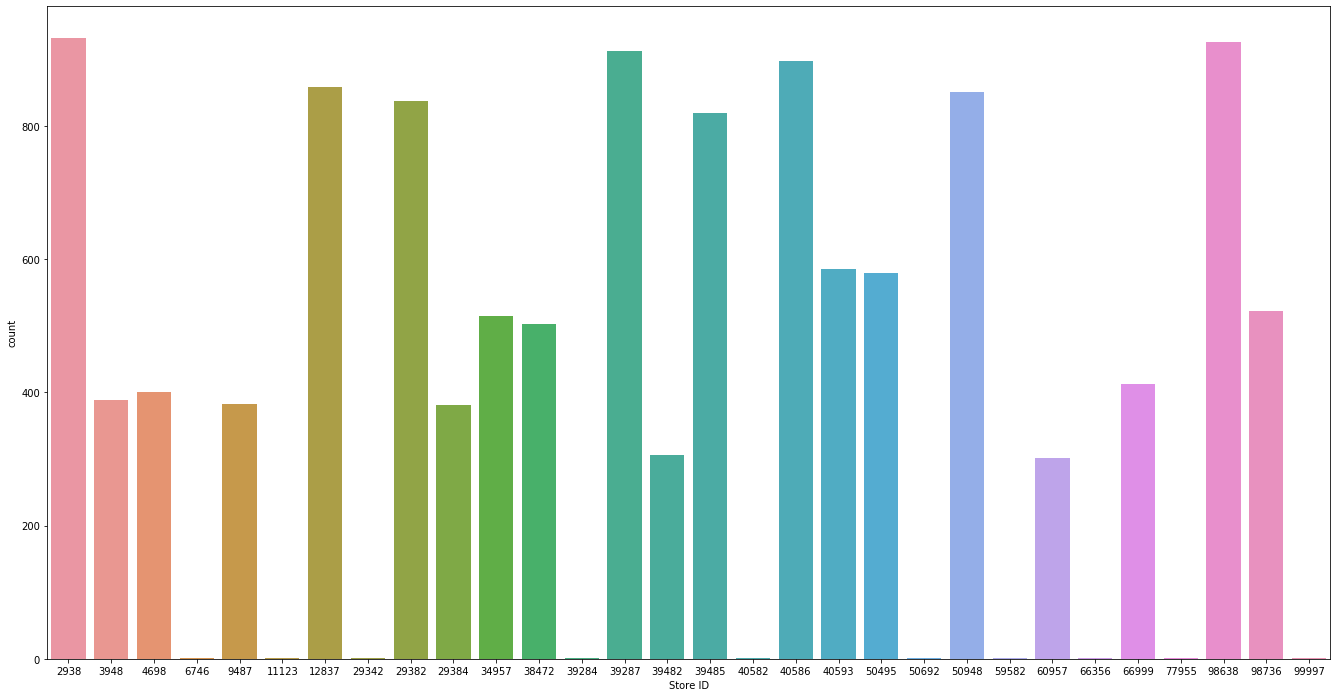

In [120]:
plt.figure(figsize=[23,12])
sns.countplot(x = 'Store ID', data = merged)
plt.show()

# Now let us visualize the total number of stores for which the price information was collected.

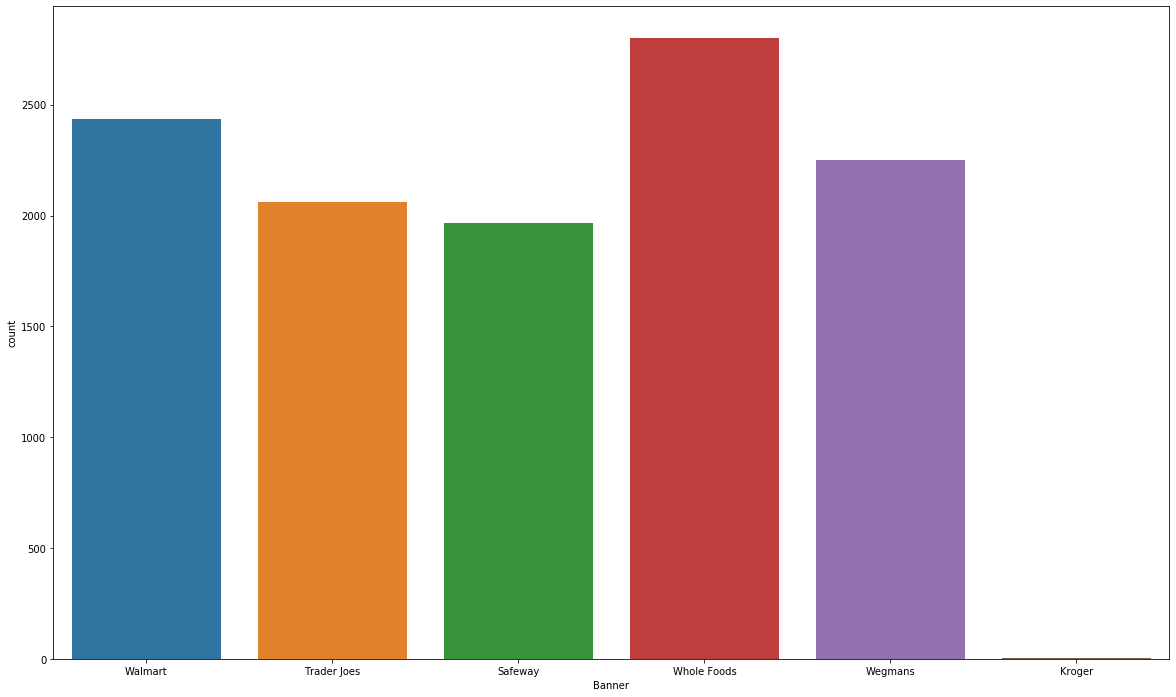

In [122]:
plt.figure(figsize=[20,12])
cplt_m1b =sns.countplot(x= 'Banner', data= merged)

# Let us see the number of stores in each region for which price information was collected.

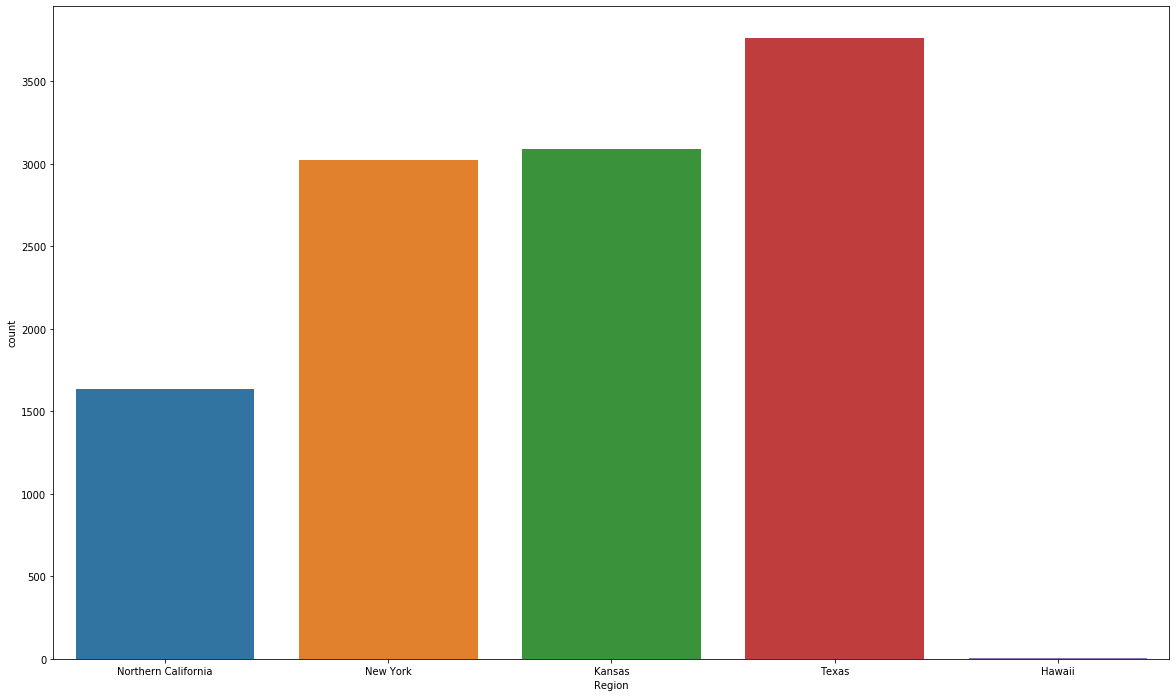

In [123]:
plt.figure(figsize=[20,12])
cplt_m1r =sns.countplot(x= 'Region', data= merged)

# Cross tabulation. 

In [0]:
d = merged.drop(['Store ID', 'Auditor ID', 'Date'], axis= 1)

In [0]:
data = d.pivot_table(values= 'Price', index= ['Banner', 'UPC'], columns= 'Region')

In [144]:
data



Region                   Kansas  New York  Northern California  Texas
Banner      UPC                                                      
Safeway     11873171.0      NaN       NaN                 6.09   5.19
            15052612.0    53.99       NaN                  NaN  54.49
            16482322.0    17.89       NaN                  NaN  18.09
            16729338.0     7.99       NaN                 9.39   8.09
            16829288.0     3.59       NaN                 4.19   3.59
...                         ...       ...                  ...    ...
Whole Foods 995798889.0    1.99     62.39                70.39  60.59
            996262978.0    1.99     14.39                16.19  13.89
            996849471.0    1.99     12.79                  NaN    NaN
            998831540.0    1.99     39.99                  NaN  38.79
            999185078.0    1.99     58.09                65.49    NaN

[4931 rows x 4 columns]

In [143]:
dg = data.groupby('Banner').count()
dg

Region,Kansas,New York,Northern California,Texas
Banner,,,,
Safeway,819,0,306,838
Trader Joes,381,382,401,898
Walmart,585,859,412,579
Wegmans,389,933,0,927
Whole Foods,913,851,515,523


# No price information for Safeway store in New York, if there is any Safeway in NY.

# Now let us save the data to csv in a folder we like. In my case I chose to save to the following path: C:\TBBacha\DataScience\Engage3 

In [0]:
data.to_csv('C:\TBBacha\DataScience\Engage3\newdata.csv')

# Checking for the saved data 

In [0]:
saved_data =pd.read_csv('C:\TBBacha\DataScience\Engage3\newdata.csv')

In [152]:
saved_data

,Banner,UPC,Kansas,New York,Northern California,Texas
0,Safeway,11873171.0,NaN,NaN,6.09,5.19
1,Safeway,15052612.0,53.99,NaN,NaN,54.49
2,Safeway,16482322.0,17.89,NaN,NaN,18.09
3,Safeway,16729338.0,7.99,NaN,9.39,8.09
4,Safeway,16829288.0,3.59,NaN,4.19,3.59
...,...,...,...,...,...,...
4926,Whole Foods,995798889.0,1.99,62.39,70.39,60.59
4927,Whole Foods,996262978.0,1.99,14.39,16.19,13.89
4928,Whole Foods,996849471.0,1.99,12.79,NaN,NaN
4929,Whole Foods,998831540.0,1.99,39.99,NaN,38.79


# Summary of the data

1. No Safeway store price information in New York. This tells us either there is no Safeway store in New York or the price information was not collected, if there is any.
2. There is no price information for the Kroger store
3. No auditor was sent to Hawaii to collected the price information.